<a href="https://colab.research.google.com/github/Amirhosseinpoor/AI_Course/blob/main/HW2/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upload the dataset

In [54]:
from google.colab import files
uploaded = files.upload()


Saving mp1_lr_dataset_ai4032 - mp1_lr_dataset_ai4032.csv.csv to mp1_lr_dataset_ai4032 - mp1_lr_dataset_ai4032.csv (2).csv


In [55]:
import pandas as pd

df = pd.read_csv('mp1_lr_dataset_ai4032 - mp1_lr_dataset_ai4032.csv.csv')

# Display the first 5 rows
print(df.head())


      1     2     3     4     5     6     7     8     9    10  ...   1991  \
0    13    29    44    55    61    72   200    96   112   120  ...  21680   
1 -3980 -3883 -3832     0 -3839 -3788 -3695 -3663 -3669     0  ...   7130   
2 -3959 -4058 -4131 -4033 -4009 -3941 -3996 -4071 -3971 -4021  ...   -254   

    1992   1993   1994   1995   1996   1997   1998   1999   2000  
0  21692  21697  21705  21711  21729  21742  21746  21763  21777  
1   7150   7117   7023   7064      0   7027   6929   6954   6867  
2   -296   -303      0   -327   -274   -358   -278   -346   -299  

[3 rows x 2000 columns]


columnar array

In [56]:
import pandas as pd
import numpy as np

column_indices = np.arange(len(df.columns)).reshape(-1, 1)

print("Column indices as a column vector:")
print(column_indices)


Column indices as a column vector:
[[   0]
 [   1]
 [   2]
 ...
 [1997]
 [1998]
 [1999]]


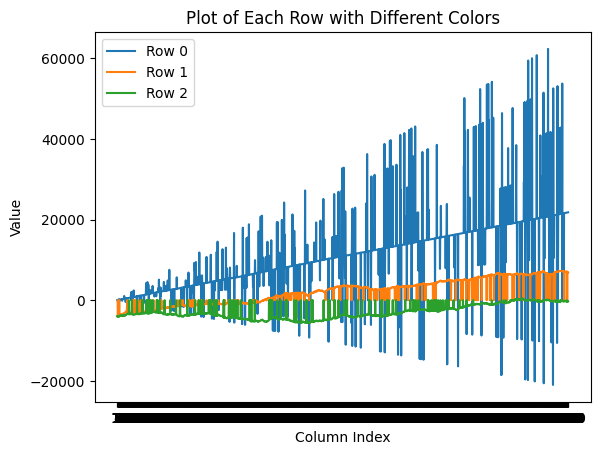

In [57]:
import matplotlib.pyplot as plt

# Plot each row of the DataFrame with a different color
for i in range(df.shape[0]):
    plt.plot(df.columns, df.iloc[i], label=f'Row {i}')

# Add labels and legend
plt.xlabel("Column Index")
plt.ylabel("Value")
plt.title("Plot of Each Row with Different Colors")
plt.legend()
plt.show()


Data Cleaning Methods

In [58]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,13,29,44,55,61,72,200,96,112,120,...,21680,21692,21697,21705,21711,21729,21742,21746,21763,21777
1,-3980,-3883,-3832,0,-3839,-3788,-3695,-3663,-3669,0,...,7130,7150,7117,7023,7064,0,7027,6929,6954,6867
2,-3959,-4058,-4131,-4033,-4009,-3941,-3996,-4071,-3971,-4021,...,-254,-296,-303,0,-327,-274,-358,-278,-346,-299


Data Cleaning

In [59]:
import pandas as pd
import numpy as np

def replace_outliers_with_neighbor_mean(df):
    df_clean = df.copy()

    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        for i in range(len(df)):
            value = df.loc[i, col]
            if value < lower_bound or value > upper_bound:
                prev_val = df[col].iloc[i - 1] if i > 0 else np.nan
                next_val = df[col].iloc[i + 1] if i < len(df) - 1 else np.nan
                neighbor_mean = np.nanmean([prev_val, next_val])
                df_clean.loc[i, col] = neighbor_mean

    return df_clean
df_cleaned = replace_outliers_with_neighbor_mean(df)


First Row Comparison: Original vs Cleaned

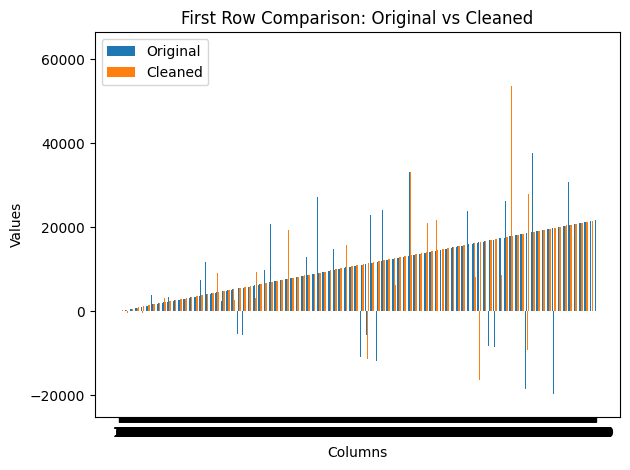

In [60]:
import matplotlib.pyplot as plt

# Extract the first row from both dataframes
original = df.iloc[0]
cleaned = df_cleaned.iloc[0]

# Set up the bar chart
labels = original.index
x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, original, width, label='Original')
bars2 = ax.bar(x + width/2, cleaned, width, label='Cleaned')

# Add labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('First Row Comparison: Original vs Cleaned')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [61]:
print(df_cleaned.isnull().sum())

1       0
2       0
3       0
4       0
5       0
       ..
1996    0
1997    0
1998    0
1999    0
2000    0
Length: 2000, dtype: int64


In [62]:
import pandas as pd

df = pd.read_csv('mp1_lr_dataset_ai4032 - mp1_lr_dataset_ai4032.csv.csv')

# Display the first 5 rows
print(df.head())


      1     2     3     4     5     6     7     8     9    10  ...   1991  \
0    13    29    44    55    61    72   200    96   112   120  ...  21680   
1 -3980 -3883 -3832     0 -3839 -3788 -3695 -3663 -3669     0  ...   7130   
2 -3959 -4058 -4131 -4033 -4009 -3941 -3996 -4071 -3971 -4021  ...   -254   

    1992   1993   1994   1995   1996   1997   1998   1999   2000  
0  21692  21697  21705  21711  21729  21742  21746  21763  21777  
1   7150   7117   7023   7064      0   7027   6929   6954   6867  
2   -296   -303      0   -327   -274   -358   -278   -346   -299  

[3 rows x 2000 columns]


In [63]:
df = df.T
df.head()

,0,1,2
1,13.0,-3980.0,-3959.0
2,29.0,-3883.0,-4058.0
3,44.0,-3832.0,-4131.0
4,55.0,0.0,-4033.0
5,61.0,-3839.0,-4009.0


In [64]:
df.cleaned = df.T
df.head()

<ipython-input-64-f8023375789c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cleaned = df.T


,0,1,2
1,13.0,-3980.0,-3959.0
2,29.0,-3883.0,-4058.0
3,44.0,-3832.0,-4131.0
4,55.0,0.0,-4033.0
5,61.0,-3839.0,-4009.0


From scratch

In [79]:
df.head()

,0,1,2
1,13.0,-3980.0,-3959.0
2,29.0,-3883.0,-4058.0
3,44.0,-3832.0,-4131.0
4,55.0,0.0,-4033.0
5,61.0,-3839.0,-4009.0


Cost Function Convergence

Learned Parameters (theta): [-2832.17572616   783.44073056]


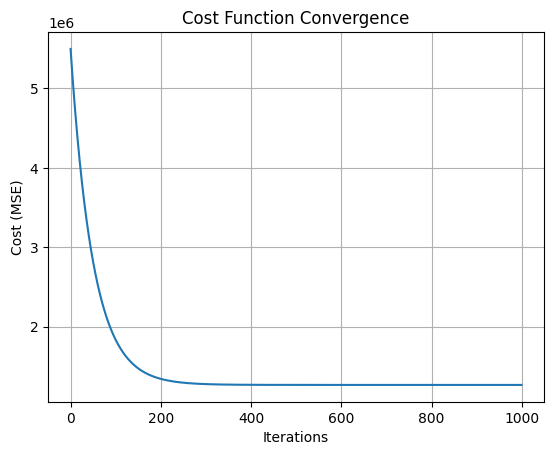

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
X = df.iloc[:, 0].values.reshape(-1, 1)  # Feature (e.g., Row 1)
y = df.iloc[:, 2].values.reshape(-1, 1)  # Target (e.g., Row 3)

# Feature scaling
X = (X - X.mean()) / X.std()

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize parameters
theta = np.zeros((2, 1))  # [bias, weight]
learning_rate = 0.01
n_iterations = 1000
m = len(y)

# Cost function: Mean Squared Error
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent
cost_history = []

for i in range(n_iterations):
    gradients = (1 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients
    cost = compute_cost(X_b, y, theta)
    cost_history.append(cost)

# Final parameters
print("Learned Parameters (theta):", theta.ravel())

# Plot cost over iterations
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.grid(True)
plt.show()


MAE Cost

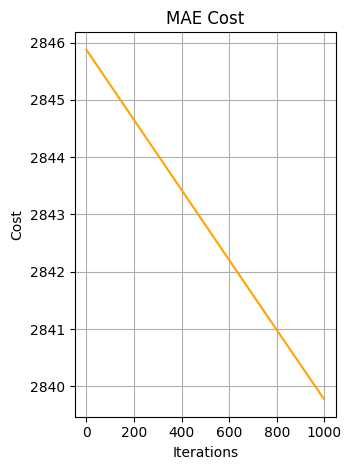

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (example: Row 1 as X, Row 3 as y)
X = df.iloc[:, 0].values.reshape(-1, 1)  # Feature
y = df.iloc[:, 2].values.reshape(-1, 1)  # Target

# Normalize feature
X = (X - X.mean()) / X.std()
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term

# Settings
learning_rate = 0.01
n_iterations = 1000
m = len(y)

# Initialize parameters for both
theta_mse = np.zeros((2, 1))
theta_mae = np.zeros((2, 1))
cost_mae_history = []
def mae_cost(X, y, theta):
    return (1 / m) * np.sum(np.abs(X.dot(theta) - y))
for i in range(n_iterations):
# MAE gradients and update (subgradient)
    error = X_b.dot(theta_mae) - y
    gradients_mae = (1 / m) * X_b.T.dot(np.sign(error))
    theta_mae -= learning_rate * gradients_mae
    cost_mae_history.append(mae_cost(X_b, y, theta_mae))
    plt.subplot(1, 2, 2)


plt.plot(cost_mae_history, label='MAE Cost', color='orange')
plt.title('MAE Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)

plt.tight_layout()
plt.show()

Using sklearn to train models

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Original data (after transposing)
X = df.iloc[:, :-1]  # First two columns as features
y = df.iloc[:, -1]   # Last column as target

# Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model_original = LinearRegression()
model_original.fit(X_train, y_train)


LinearRegression()

Plot the results of the trained models

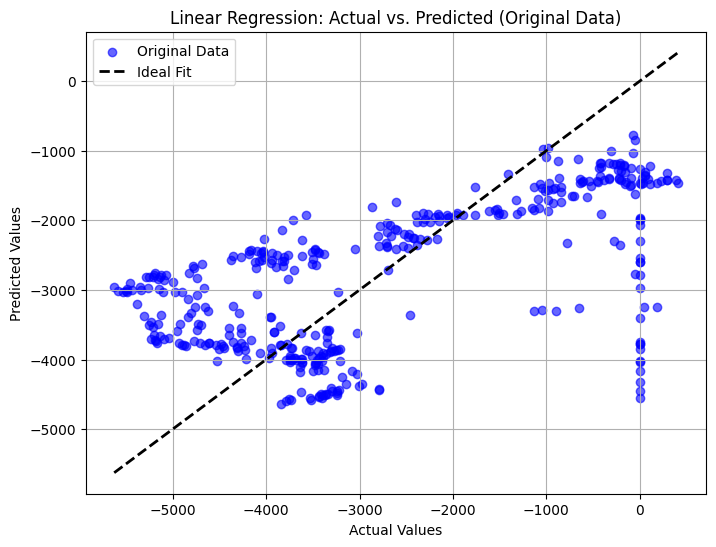

In [67]:
import matplotlib.pyplot as plt

# Predict using the trained model
y_pred = model_original.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Original Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted (Original Data)')
plt.legend()
plt.grid(True)
plt.show()


Gradual Data Cleaning and Model Retraining

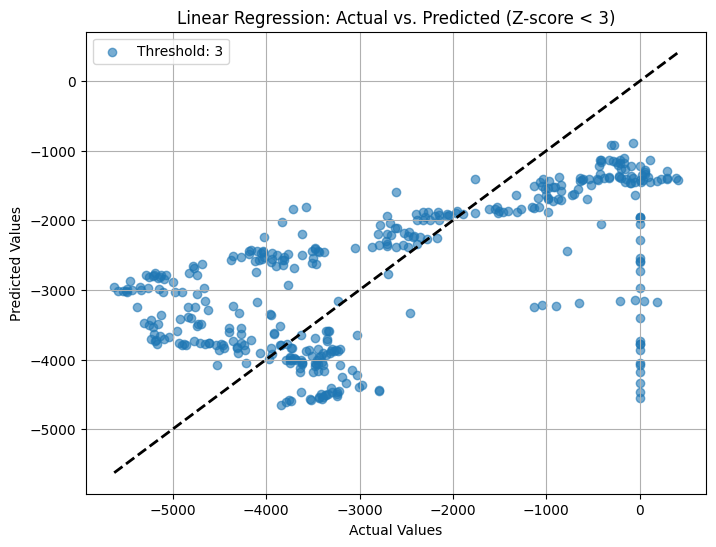

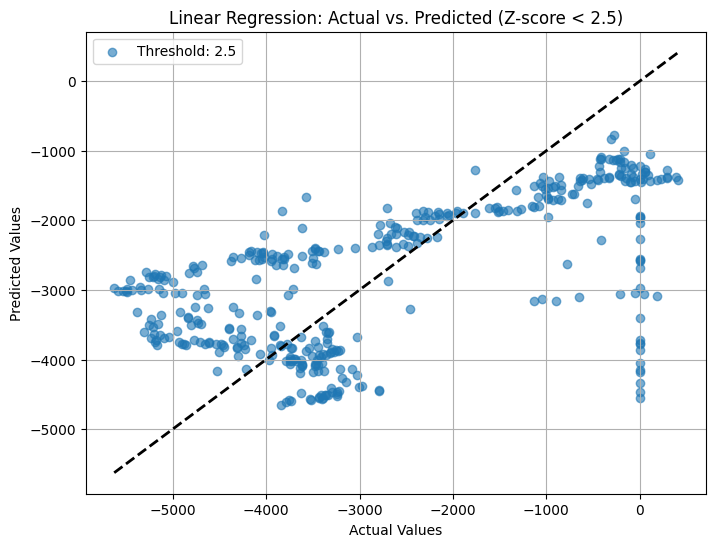

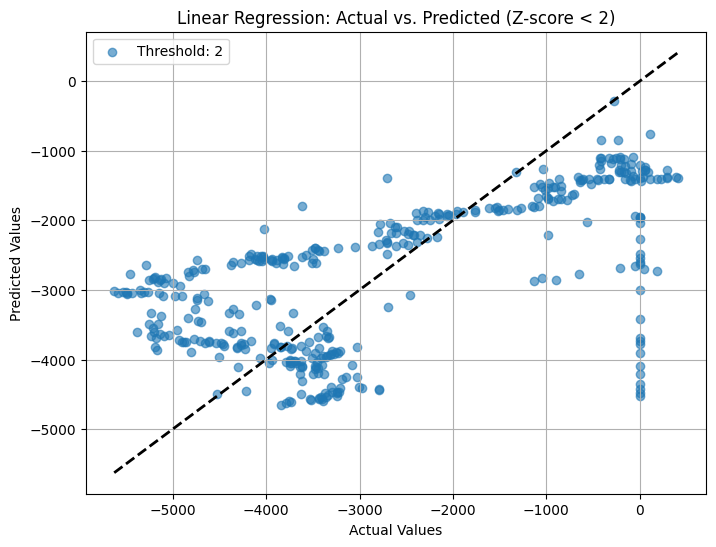

In [68]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Start with original transposed data
df_step_clean = df.copy()

# Define Z-score threshold
thresholds = [3, 2.5, 2]

# Store models and results
for thresh in thresholds:
    # Identify outliers
    z_scores = np.abs(zscore(df_step_clean))
    z_scores_df = pd.DataFrame(z_scores, columns=df_step_clean.columns, index=df_step_clean.index)

    # Replace outliers with average of neighboring values
    df_temp = df_step_clean.copy()
    for col in df_temp.columns:
        for i in range(len(df_temp)):
            if z_scores_df[col].iloc[i] > thresh:
                if 0 < i < len(df_temp) - 1:
                    df_temp.iloc[i, col] = (df_temp.iloc[i - 1, col] + df_temp.iloc[i + 1, col]) / 2
                elif i == 0:
                    df_temp.iloc[i, col] = df_temp.iloc[i + 1, col]
                elif i == len(df_temp) - 1:
                    df_temp.iloc[i, col] = df_temp.iloc[i - 1, col]

    # Train and test the model
    X = df_temp.iloc[:, :-1]
    y = df_temp.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label=f'Threshold: {thresh}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Linear Regression: Actual vs. Predicted (Z-score < {thresh})')
    plt.legend()
    plt.grid(True)
    plt.show()


In [69]:
df.head()

,0,1,2
1,13.0,-3980.0,-3959.0
2,29.0,-3883.0,-4058.0
3,44.0,-3832.0,-4131.0
4,55.0,0.0,-4033.0
5,61.0,-3839.0,-4009.0


In [70]:
df_temp.head()

,0,1,2
1,13.0,-3980.0,-3959.0
2,29.0,-3883.0,-4058.0
3,44.0,-3832.0,-4131.0
4,55.0,0.0,-4033.0
5,61.0,-3839.0,-4009.0


using HuberRegressor and RANSACRegressor from sklearn

In [71]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor, LinearRegression
from sklearn.model_selection import train_test_split

# Use uncleaned, transposed data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Huber Regressor
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)

# Model 2: RANSAC Regressor (corrected argument: estimator)
ransac_model = RANSACRegressor(estimator=LinearRegression())
ransac_model.fit(X_train, y_train)


RANSACRegressor(estimator=LinearRegression())

Visualization of Robust Regression Results

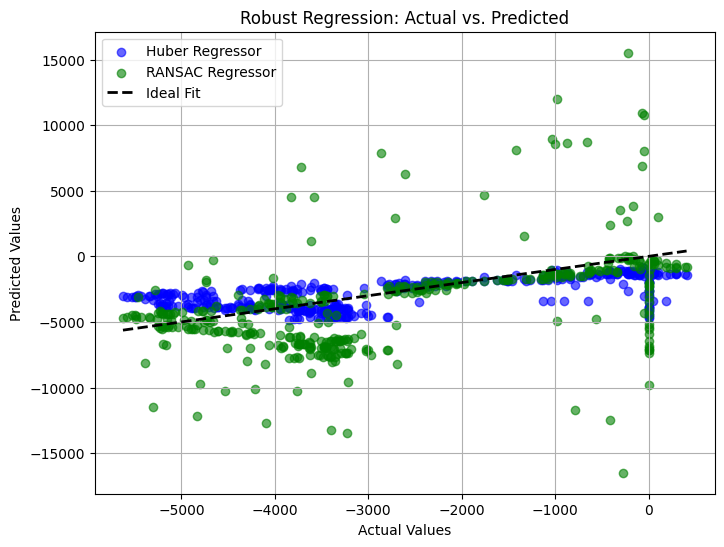

In [72]:
import matplotlib.pyplot as plt

# Predict using both models
y_pred_huber = huber_model.predict(X_test)
y_pred_ransac = ransac_model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_huber, color='blue', alpha=0.6, label='Huber Regressor')
plt.scatter(y_test, y_pred_ransac, color='green', alpha=0.6, label='RANSAC Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Robust Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()


Model Parameter Comparison

In [73]:
# Print parameters for Ordinary Linear Regression
print("Linear Regression Coefficients:", model_original.coef_)
print("Linear Regression Intercept:", model_original.intercept_)
print()

# Print parameters for Huber Regressor
print("Huber Regressor Coefficients:", huber_model.coef_)
print("Huber Regressor Intercept:", huber_model.intercept_)
print()

# Print parameters for RANSAC Regressor
print("RANSAC Regressor Coefficients:", ransac_model.estimator_.coef_)
print("RANSAC Regressor Intercept:", ransac_model.estimator_.intercept_)


Linear Regression Coefficients: [0.02177437 0.28121775]
Linear Regression Intercept: -3672.8280162730316

Huber Regressor Coefficients: [0.01820974 0.31247338]
Huber Regressor Intercept: -3743.525944821666

RANSAC Regressor Coefficients: [ 0.38743267 -0.05292525]
RANSAC Regressor Intercept: -8013.411274844262


Univariate Regression to Approximate the Third Row

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Use second row (index 1) as X, third row (index 2) as y
X_uni = df.iloc[1, :].values.reshape(-1, 1)  # Feature
y_uni = df.iloc[2, :].values                # Target

# Fit linear regression
uni_model = LinearRegression()
uni_model.fit(X_uni, y_uni)

# Predict and evaluate
y_pred_uni = uni_model.predict(X_uni)
mse = mean_squared_error(y_uni, y_pred_uni)
r2 = r2_score(y_uni, y_pred_uni)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 2512.2524691820195
R² Score: 0.9993052271479596


In [76]:
df.head()

,0,1,2
1,13.0,-3980.0,-3959.0
2,29.0,-3883.0,-4058.0
3,44.0,-3832.0,-4131.0
4,55.0,0.0,-4033.0
5,61.0,-3839.0,-4009.0


3D Scatter Plot of Rows 1, 2, and 3

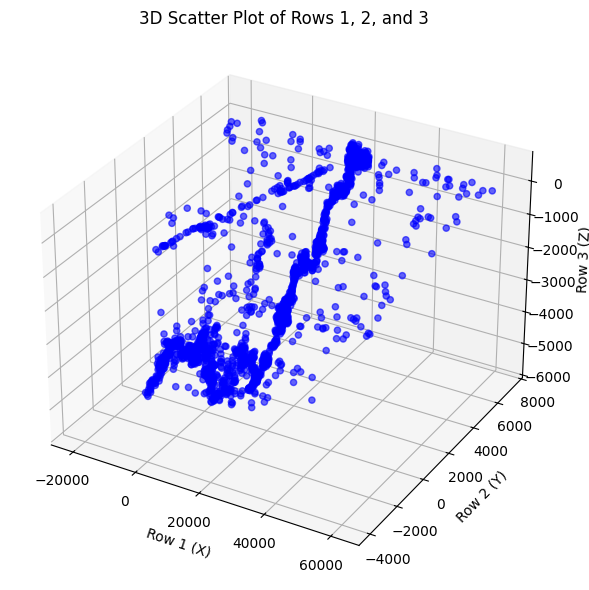

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract columns from transposed df (2000 samples × 3 features)
x = df.iloc[:, 0].values  # Column 0: original Row 1
y = df.iloc[:, 1].values  # Column 1: original Row 2
z = df.iloc[:, 2].values  # Column 2: original Row 3

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o', alpha=0.6)

# Set labels
ax.set_xlabel('Row 1 (X)')
ax.set_ylabel('Row 2 (Y)')
ax.set_zlabel('Row 3 (Z)')
ax.set_title('3D Scatter Plot of Rows 1, 2, and 3')

plt.tight_layout()
plt.show()
